In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

import matplotlib.pyplot as plt

# Optional: Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Optional: Configure the default size of the plots
plt.rcParams["figure.figsize"] = (10, 6)

In [5]:
excel_path = "../data/Historico_do_Preco_Horario_-_17_de_abril_de_2018_a_6_de_novembro_de_2024.xlsx"


df = pd.ExcelFile(excel_path)
df.sheet_names

['Test Sheet']

In [6]:
data = df.parse(sheet_name="Test Sheet")

In [7]:
data.dropna(inplace=True)

In [ ]:
# Despivotar os dados para transformar colunas de datas em linhas
data_melted = data.melt(
    id_vars=["Hora", "Submercado"],  # Colunas que permanecem como identificadores
    var_name="Data",  # Nome para a nova coluna que conterá os nomes das colunas originais (datas)
    value_name="Valor",  # Nome para a nova coluna que conterá os valores das colunas originais
)

# Converter a coluna "Data" para o formato datetime
data_melted["Data"] = pd.to_datetime(data_melted["Data"], errors="coerce")
data_melted = data_melted.reset_index(drop=True)
data_melted = data_melted.assign(
    Ano=data_melted.Data.dt.year, Mes=data_melted.Data.dt.month
)

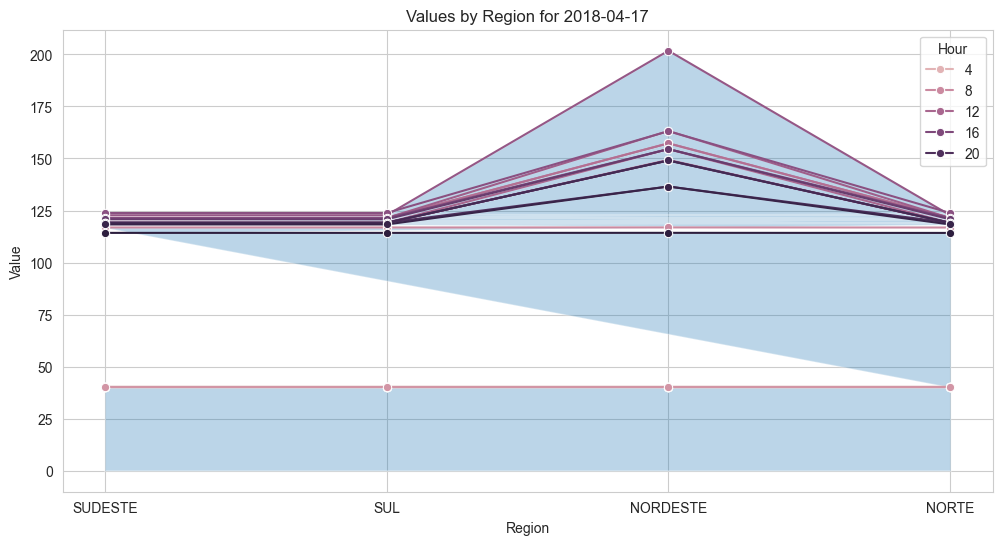

In [ ]:
# Filtrar os dados para um dia específico
specific_day = data_melted[data_melted['Data'] == pd.to_datetime('2018-04-17')]

# Criar um gráfico usando seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x="Hora", y="Valor", hue="Submercado", data=specific_day, marker='o')
plt.title('Valores por Submercado para 2018-04-17')
plt.xlabel('Hora')
plt.ylabel('Valor')
plt.legend(title='Submercado')
plt.show()

In [30]:
data_melted.Mes.value_counts()

Mes
7     19964
10    19964
8     19872
5     19596
9     19320
6     18952
4     17572
11    17112
12    17112
1     17112
3     17112
2     15640
Name: count, dtype: int64

In [10]:
data_melted[
    data_melted["Hora"]
    == "Observação: As linhas 98 a 101 são referentes a segunda hora 23h as 23h59 no dia 16/02/2019 considerando o horário de verão"
] = 25

In [19]:
data_melted.value_counts("Hora")

Hora
1     9536
13    9536
22    9536
21    9536
20    9536
19    9536
18    9536
17    9536
16    9536
15    9536
14    9536
12    9536
2     9536
11    9536
10    9536
9     9536
8     9536
7     9536
6     9536
5     9536
4     9536
3     9536
23    9536
Name: count, dtype: int64

In [12]:
# data_melted.to_csv("../data/clean_data.csv", index=False)

In [13]:
data_melted.columns

Index(['Hora', 'Submercado', 'Data', 'Valor'], dtype='object')